A Comprehensive Exploration of the Birthday Paradox: From Small Groups to Million-Scale Simulations

#### **Case 1: Probability of Shared Birthdays**

**1. Basic Calculation**

**Q 1.1. Develop an algorithm to calculate the probability of at least two members sharing a birthday.**

In [12]:
def theor_prob_sharedBirthday(group_size):
    noOfDays = 365
    pob_noTwoShare = 1

    for i in range(group_size):
        pob_noTwoShare *= (noOfDays - i) / noOfDays

    prob_atleastTwo = 1 - pob_noTwoShare

    return prob_atleastTwo

In [13]:
prob_atleastTwo = theor_prob_sharedBirthday(12)
prob_atleastTwo

0.1670247888380645

**Q 1.2. Implement the solution in Python and discuss its computational complexity.**

**Approach:**  

This is to calculate the true value of the probability that at least two individuals have the same birthday.  

We can compute the probability that no two members have the same birthday, then we can write:  

$P(\text{At least 2 members have the same birthday}) = 1 - P(\text{No 2 members have the same birthday})$  
$= 1 - \frac{(365-0) \times (365-1) \times 363 \times 362 \times 361 \times \dots \times (365-(12-1))}{365^{12}}$  

**Complexities:**  

The current approach is $O(n)$ because we iterate over all individuals to compute the probability.

**We can use Monte Carlo simulations to determine how many trials are needed for a stable probability:**  

Using Monte Carlo simulations, we estimate the probability that at least two individuals share the same birthday using random sampling techniques.

1. **Simulation Function (func_no_shared_birthdays_simu):**  

a. Created a function that accepts the group size and the number of simulation iterations as parameters.  

b. Set up a counter to track the number of simulations where at least two individuals share a birthday.  

c. For each simulation iteration:  
   - Initialize a list to represent each day of the year, setting all values to zero.  
   - Assign a random birthday to each individual in the given `group_size`.  
   - Increment the corresponding day's count by increasing the value in the array at the index representing that day.  
   - If any day's count exceeds one, indicating a shared birthday, exit the loop.  
   - If a shared birthday is found, increment the shared birthday counter and terminate the current simulation iteration early.  

d. Probability:  
   After completing all simulations, the estimated probability is calculated by dividing the number of simulations with shared birthdays by the total number of simulations.

In [14]:
import random

def simulate_shared_birthday_probability(group_size, num_simulations=1000):
    success_count = 0

    for _ in range(num_simulations):
        birthdays = [0] * 365  # Initialize list to count birthdays for each day
        for _ in range(group_size):
            rand_day = random.randint(0, 364)  # Random birthday assigned to a day (0 to 364)
            birthdays[rand_day] += 1
            if birthdays[rand_day] > 1:
                success_count += 1
                break

    probability = success_count / num_simulations
    return probability

estimated_probability = simulate_shared_birthday_probability(12)
print(f"Probability of at least two people sharing a birthday in a group of 12: {estimated_probability:.4f}")


Probability of at least two people sharing a birthday in a group of 12: 0.1470


**We can use Monte Carlo simulations to determine how many trials are needed for a stable probability:**  

Using Monte Carlo simulations to estimate the probability that at least two individuals share the same birthday using random sampling techniques.  

1. **Simulation Function (func_no_shared_birthdays_simu):**  

a. Created a function that accepts the group size and the number of simulation iterations as parameters.  

b. Set up a counter to track the number of simulations where at least two individuals share a birthday.  

c. For each simulation iteration:  
   - Initialize a list to represent each day of the year, with all values set to zero.  
   - Assign a random birthday to each individual in the input `group_size`.  
   - Increment the corresponding day's count by updating the value in the array at the index representing that day.  
   - If any day's count exceeds one, indicating a shared birthday, exit the loop.  
   - If a shared birthday is found, increment the shared birthday counter and terminate the current simulation iteration early.  

d. Probability:  
   After completing all simulations, the estimated probability is calculated by dividing the number of simulations with shared birthdays by the total number of simulations.

**Complexity:** The complexity of the algorithm is dependent on by both group size (group_size) and the number of simulations (num_simulations):

- For each simulation, assigning birthdays involves iterating over the group size, resulting in a time complexity of $O(\text{group_size})$ per simulation.

- The simulation runs for `num_simulations = 1000` iterations , thus the total time complexity of $O(\text{num_simulations} * \text{group_size})$.

- Probability of counting days and storing in the birthdays has a constant time. Therefore

Therefore the total time complexity is $O(\text{num_simulations} * \text{group_size})$.

**Space Complexity** Since the only extra space used is the fixed-sized list the total space complexity is $O(1)$

**Q 1.3. Include in-line comments for clarity and use Matplotlib to visualize results.**

**With Multiple Simulations**

Now, to determine the optimal number of iteration for a reliable estimate of the probability, here we are computing the estimated probabilities for various numbers of simulations, also using `matplotlib` library I am ploting these probabilities against the number of simulations, so that it can be visually represented when or for what number of simulations will the estimated probabilitites coverges with the theoritical probability.
Additionally, have marked the theoretical probability on the plot for comparison.

Simulations: 10, Estimated Probability: 0.4000
Simulations: 25, Estimated Probability: 0.2000
Simulations: 50, Estimated Probability: 0.2000
Simulations: 100, Estimated Probability: 0.0800
Simulations: 250, Estimated Probability: 0.2080
Simulations: 500, Estimated Probability: 0.1720
Simulations: 1000, Estimated Probability: 0.1620
Simulations: 2500, Estimated Probability: 0.1716
Simulations: 5000, Estimated Probability: 0.1618
Simulations: 10000, Estimated Probability: 0.1627
Simulations: 25000, Estimated Probability: 0.1660
Simulations: 50000, Estimated Probability: 0.1664
Simulations: 100000, Estimated Probability: 0.1677


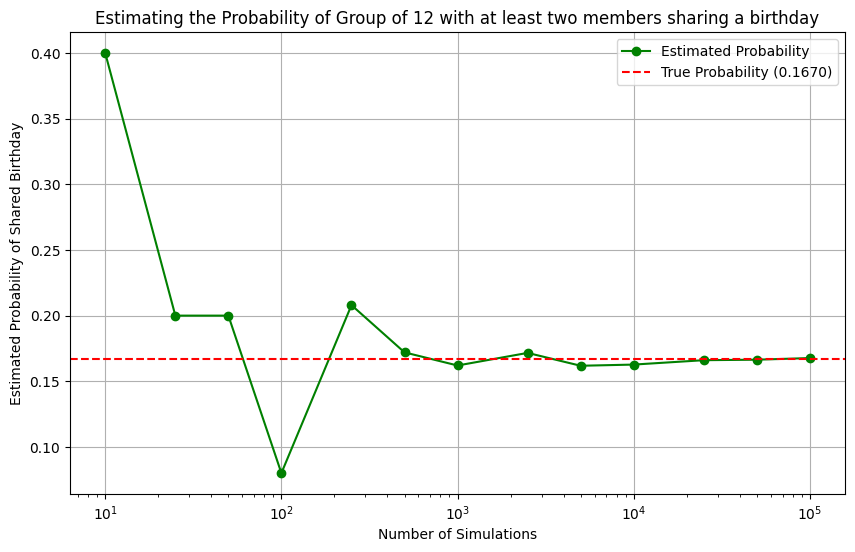

In [15]:
import random
import matplotlib.pyplot as plt

def func_no_shared_birthdays(groupSize):
    birthdays = [0] * 365  # List to count birthdays for each day
    for _ in range(groupSize):
        rand_day = random.randint(0, 364)  # To maintain the santity of list whose index starts from zero, so shifing the dates from range 1 to 365 to 0 t 364
        birthdays[rand_day] += 1
        if birthdays[rand_day] > 1:
            return False  # Shared birthday found
    return True  # No shared birthdays

def monte_carlo_simu_birthdays(groupSize):
    num_simulations_list = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
    simulation_counts = num_simulations_list
    probabilities = []

    for num_simulations in num_simulations_list:
        success_count = 0
        for j in range(num_simulations):
            if not func_no_shared_birthdays(groupSize):  # At least one shared birthday
                success_count += 1
        prob_succ = success_count / num_simulations
        probabilities.append(prob_succ)
        print(f"Simulations: {num_simulations}, Estimated Probability: {prob_succ:.4f}")

    # This is the theoretical probability
    true_probability = theor_prob_sharedBirthday(groupSize)


    plt.figure(figsize=(10, 6))
    plt.plot(simulation_counts, probabilities, marker='o', linestyle='-', color='g', label='Estimated Probability')
    plt.axhline(y=true_probability, color='r', linestyle='--', label=f'True Probability ({true_probability:.4f})')
    plt.title(f"Estimating the Probability of Group of {groupSize} with at least two members sharing a birthday")
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Probability of Shared Birthday")
    plt.xscale("log")
    plt.legend()
    plt.grid(True)
    plt.show()

group_size = 12
monte_carlo_simu_birthdays(group_size)


**Q 1.4. Determine an optimal number of iterations for a reliable estimate.**

The number of simulation started to take most stable shape from 1000 but it become most stable from 10000 simulations.

**Q 1.5. Justify how you define this number.**

Firstly looking at the data as in the simulation number and its corresponding probability, the numbers show that the probability is moving more towards 0.166 from 10000 trials. And also from the above plot we can see it pretty much goes to a straight line after that point which isthe absolute value.


**Q. 1.6.Compute the probability of at least three people sharing a birthday and analyze the impact on computational complexity.**

**Approach :** 

The probability that all three share the same birthday is: 

1st person can select any of the days, while second person can select only in one way and the third person can select in only one way.

$\frac{365}{365} \times \frac{1}{365} \times \frac{1}{365} = \frac{1}{365^2}$

Now, for a larger group — here, 12 people — we consider how many different groups of 3 people we can choose. This is given by the number of ways we can select 3 people from a group of 12. We use combinations to compute this because we are not concerned with the order in which birthdays are assigned; rather, we care about the number of ways three people can share the same birthday.

Let me know if you'd like a more casual or more academic tone!
$\binom{12}{3}$

So, the probability that some group of 3 people out of 12 all share the same birthday is approximately:

$\frac{1}{365^2} \times \binom{12}{3}$


In [1]:
import math

def at_least_three_shared_birthdays(group_size):

    # Probability that 3 specific people share a birthday
    p_same_birthday = 1 / (365 ** 2)

    # Number of ways to choose 3 people from 12
    n_people = 12
    combinations = math.comb(n_people, 3) 

    # Approximate probability that any group of 3 people share a birthday
    approx_probability = p_same_birthday * combinations

    print(f"Probability that at least 3 out of {n_people} people share a birthday: {approx_probability:.6f}")
    
at_least_three_shared_birthdays(4)

Probability that at least 3 out of 12 people share a birthday: 0.001651


**Approach:**  

To implement the probability that in a group of a specified size, at least three individuals share the same birthday, we use a Monte Carlo simulation, which involves running a large number of trials to estimate the probability of the event.  

- A counter `success_count` is initialized to zero. This will track the number of simulations where at least three people share the same birthday.  
- A list `birthdays` of size 365 is initialized to zeros. Each index represents a day of the year, and the value at each index will count the number of people having their birthday on that day.  
- In the second for-loop, a random integer between 0 and 364 is generated, simulating a birthday.  
- The corresponding index of the `birthdays` list is incremented.  
- Checked if the count at that index becomes three. This indicates that three people share the same birthday, then the `success_count` is incremented, and the simulation for this iteration is terminated early to save computation time.  
- After completing all the simulations, the probability is estimated by dividing the `success_count` by the total number of simulations (`num_simulations`).

In [17]:
import random
import matplotlib.pyplot as plt

def simulate_at_least_three_shared_birthdays(group_size, num_simulations=100000):
    success_count = 0

    for _ in range(num_simulations):
        # Initialize list to count birthdays for each day
        birthdays = [0] * 365
        for _ in range(group_size):
            # Random birthday assigned to a day (0 to 364)
            rand_day = random.randint(0, 364)
            birthdays[rand_day] += 1
            # If any of the dates show three or more occurences it is a success case
            if birthdays[rand_day] >= 3:
                success_count += 1
                break

    probability = success_count / num_simulations
    return probability

group_size = 12
estimated_probability = simulate_at_least_three_shared_birthdays(group_size)
print(f"Estimated probability of at least three people sharing a birthday in a group of {group_size}: {estimated_probability:.4f}")


Estimated probability of at least three people sharing a birthday in a group of 12: 0.0015


**Using Multiple simulations**

In [18]:
import random
import math
import matplotlib.pyplot as plt

def func_at_least_three_shared_birthdays(group_size):
    days_in_year = 365
    birthdays = [0] * days_in_year

    for _ in range(group_size):
        rand_day = random.randint(0, days_in_year - 1)
        birthdays[rand_day] += 1

        if birthdays[rand_day] >= 3:
            return True  # Shared birthday found
    return False  # No shared birthdays

Simulations: 10, Estimated Probability: 0.0000
Simulations: 25, Estimated Probability: 0.0000
Simulations: 50, Estimated Probability: 0.0000
Simulations: 100, Estimated Probability: 0.0100
Simulations: 250, Estimated Probability: 0.0040
Simulations: 500, Estimated Probability: 0.0040
Simulations: 1000, Estimated Probability: 0.0040
Simulations: 2500, Estimated Probability: 0.0016
Simulations: 5000, Estimated Probability: 0.0010
Simulations: 10000, Estimated Probability: 0.0024
Simulations: 25000, Estimated Probability: 0.0012
Simulations: 50000, Estimated Probability: 0.0018
Simulations: 100000, Estimated Probability: 0.0016
Simulations: 250000, Estimated Probability: 0.0017
Simulations: 500000, Estimated Probability: 0.0016


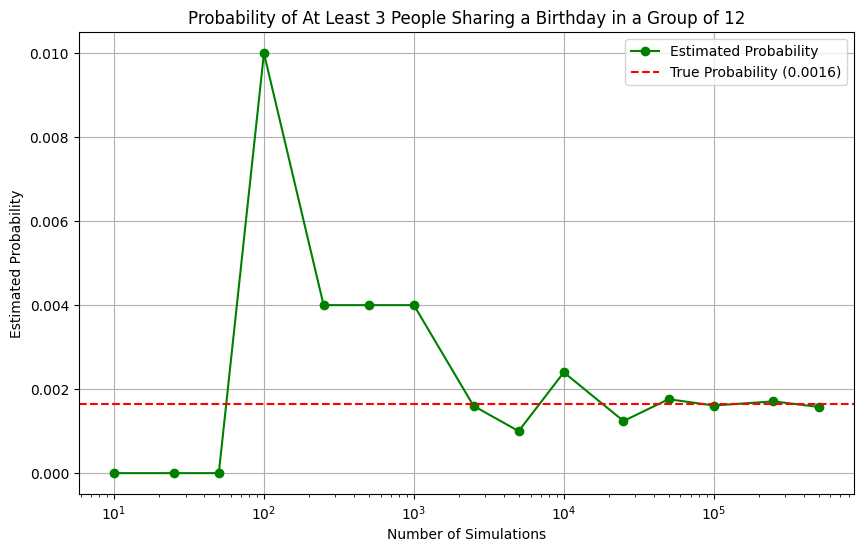

In [30]:
def monte_carlo_simu_birthdays(group_size):
    num_simulations_list = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
    probabilities = []

    for num_simulations in num_simulations_list:
        success_count = sum(func_at_least_three_shared_birthdays(group_size) for _ in range(num_simulations))
        prob_succ = success_count / num_simulations
        probabilities.append(prob_succ)
        print(f"Simulations: {num_simulations}, Estimated Probability: {prob_succ:.4f}")
    true_probability = theoritical_prob_approximation(group_size)
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(num_simulations_list, probabilities, marker='o', linestyle='-', color='g', label='Estimated Probability')
    plt.axhline(y=true_probability, color='r', linestyle='--', label=f'True Probability ({true_probability:.4f})')
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Probability")
    plt.title(f"Probability of At Least 3 People Sharing a Birthday in a Group of {group_size}")
    plt.legend()
    plt.xscale("log")
    plt.grid(True)
    plt.show()

monte_carlo_simu_birthdays(12)

**Explain modifications required to compute the probability of at least three people sharing a birthday and analyze the impact on computational complexity**

**Code Modifications:**  

We made two main changes from the previous version, which checked for at least two individuals sharing the same birthday:  

- In the previous version, we checked if any birthday was shared by at least two individuals by verifying if the count for any day reached 2. To extend this to at least three individuals sharing the same birthday, we modified this condition to check if the count reaches 3. If it does, we set that as a success criterion and increment the success count.  

- Changed the condition that determines success. Now, we increment `success_count` only when the count reaches 3. This count keeps track of the number of simulations where at least three individuals share the same birthday, allowing us to estimate the probability later.  


**Impact on Computational Complexity:**  

- The computational complexity of this simulation remains approximately $O(\text{num_simulations} \times \text{group_size})$.  

Though there is no change in the time complexity, there is a positive impact on the actual runtime.  
In cases where the group size is large enough that triple birthday matches are common, the simulation may terminate earlier in each iteration upon finding such a match, thereby effectively reducing the average runtime per simulation.  

- We encountered a specific issue for smaller group sizes: triple matches are rare. Hence, to obtain a statistically significant estimate, a larger number of simulations was necessary, which increased the overall computational effort.

**Space Complexity:** Here the space complexity remains $O(1)$ because we have used the same list of size 365.

#### **2. Additional Challenge**

**Q 2.1 Extend your algorithm to analyze the probability of exactly two people sharing a birthday instead of “at least” two.
How does this adjustment affect probability and complexity?**

In [20]:
import math


def theoritical_exactly_two_share_birthday(group_size):
    if group_size < 2:
        return 0

    # Choose two people who will share a birthday
    ways_to_choose_two_from_group = math.comb(group_size, 2)

    prob_two_have_same_birthday = 1 / 365

    # Assign the unique birthdays
    assign_remaining_birthday = 1
    for i in range(2, group_size):
        assign_remaining_birthday *= (365 - i)

    # Compute probability of exactly two sharing a birthday
    prob_remaining_have_different_birthday = assign_remaining_birthday / (365 ** (group_size - 2))
    final_prob = ways_to_choose_two_from_group * prob_two_have_same_birthday * prob_remaining_have_different_birthday
    return final_prob

prob = theoritical_exactly_two_share_birthday(12)
print(f"Probability of exactly two people sharing a birthday in a group of 12: {prob:.6f}")


Probability of exactly two people sharing a birthday in a group of 12: 0.151034


In [21]:
import random
import matplotlib.pyplot as plt

def simulate_exactly_one_shared_birthday(group_size, num_simulations=100000):
    success_count = 0

    for _ in range(num_simulations):
        birthdays = [0] * 365  # Initialize list to count birthdays for each day
        for _ in range(group_size):
            rand_day = random.randint(0, 364)  # Randomly assign a birthday (0 to 364)
            birthdays[rand_day] += 1

        # Count how many days have exactly two people sharing a birthday
        count_two_sharing_birthday = sum(1 for count in birthdays if count == 2)

        # Check if there is exactly one day for the currently pointed date
        if count_two_sharing_birthday == 1:
            success_count += 1

    probability = success_count / num_simulations
    return probability

group_size = 12
estimated_probability = simulate_exactly_one_shared_birthday(group_size)
print(f"Estimated probability of exactly one shared birthday in a group of {group_size}: {estimated_probability:.4f}")


Estimated probability of exactly one shared birthday in a group of 12: 0.1553


Simulations: 10, Estimated Probability: 0.0000
Simulations: 25, Estimated Probability: 0.2400
Simulations: 50, Estimated Probability: 0.1400
Simulations: 100, Estimated Probability: 0.1900
Simulations: 250, Estimated Probability: 0.1320
Simulations: 500, Estimated Probability: 0.1740
Simulations: 1000, Estimated Probability: 0.1630
Simulations: 2500, Estimated Probability: 0.1548
Simulations: 5000, Estimated Probability: 0.1696
Simulations: 10000, Estimated Probability: 0.1550
Simulations: 25000, Estimated Probability: 0.1545
Simulations: 50000, Estimated Probability: 0.1559
Simulations: 100000, Estimated Probability: 0.1536
Simulations: 250000, Estimated Probability: 0.1556
Simulations: 500000, Estimated Probability: 0.1546


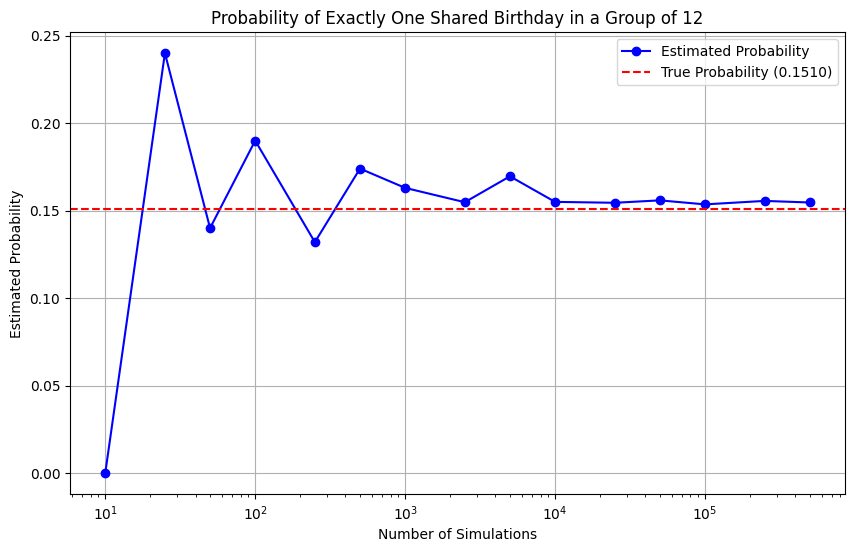


Final Estimated Probability of exactly one shared birthday in a group of 12: 0.1546


In [22]:
import random
import matplotlib.pyplot as plt

def func_only_one_shared_birthdays(groupSize):

    num_simulations_list = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 250000, 500000]
    probabilities = []

    for num_simulations in num_simulations_list:
        success_count = 0
        for _ in range(num_simulations):
            birthdays = [0] * 365
            count_two_sharing_birthday = 0
            # Counting the occurance of a particular randomly generated birthdays
            for _ in range(groupSize):
                rand_day = random.randint(0, 364)
                birthdays[rand_day] += 1

            # Counting days which has exactly two people sharing a birthday
            count_two_sharing_birthday = sum(1 for b in birthdays if b == 2)

            # Check if there is exactly one day for the currently pointed date
            if count_two_sharing_birthday == 1:
                success_count += 1

        prob_succ = success_count / num_simulations
        probabilities.append(prob_succ)
        true_probability = theoritical_exactly_two_share_birthday(group_size)

        # Print intermediate results
        print(f"Simulations: {num_simulations}, Estimated Probability: {prob_succ:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(num_simulations_list, probabilities, marker='o', linestyle='-', color='b', label='Estimated Probability')
    plt.axhline(y=true_probability, color='r', linestyle='--', label=f'True Probability ({true_probability:.4f})')
    plt.xlabel("Number of Simulations")
    plt.ylabel("Estimated Probability")
    plt.title(f"Probability of Exactly One Shared Birthday in a Group of {groupSize}")
    plt.xscale("log")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Returning the last calculated probability
    return probabilities[-1]

group_size = 12
prob = func_only_one_shared_birthdays(group_size)
print(f"\nFinal Estimated Probability of exactly one shared birthday in a group of {group_size}: {prob:.4f}")


**Q 2.2 How does this adjustment affect probability and complexity?**

**Affect on Probability:**

1. It is evident that this event is less frequesnt than the one where atleast one sjare a birthday, thus the estimated probability for exactly one shared birthday will be lower than that for at least one shared birthday, which was evident by a margin.

**Affect on Computational Complexity:**

1. The modified simulation includes an extra step to count the number of days with exactly two individuals sharing a birthday. Thus using a loop over the 365 possible birthdays to check wih the counts for each birthdays.

2. Despite this additional counting step, the overall computational complexity remains approximately $O(\text{num_simulations} \times \text{group_size})$. As the counting operation over a fixed number of days (365) is a constant-time operation and does not significantly affect the asymptotic complexity.

**Space Complexity:** Here the space complexity is $O(1)$ as we are only using the list of size 365 along with some variables.

### **Case 2: Monthly Birthday Distribution Analysis**

**Q 1.1 Compute Probability of At Least One Birthday Per Month**

In [23]:
import random

def simulate_at_least_one_birthday_per_month(group_size, num_simulations=100000):
    # Cutoff condition: If group_size < 12, return probability 0
    # Since it is impossible to have at least one birthday in every month if there are fewer than 12 people
    if group_size < 12:
        print(f"Group size {group_size} is too small to cover all 12 months.")
        return 0.0
    success_count = 0

    for _ in range(num_simulations):
        # Now there are 12 months and we have to make sure all that atleast one have birthday falls per month
        months_in_year = 12
        # Hence we are taking the month_counts array size as [0] * 12
        month_counts = [0] * months_in_year

        for _ in range(group_size):
            birth_month = random.randint(0, months_in_year - 1)
            month_counts[birth_month] += 1

        # Check if every month has at least one birthday
        if all(count > 0 for count in month_counts):
            success_count += 1

    probability = success_count / num_simulations
    print(f"Simulations: {num_simulations}, Estimated Probability: {probability:.6f}")
    return probability

num_simulations = 10000
estimated_probability = simulate_at_least_one_birthday_per_month(12, num_simulations)


Simulations: 10000, Estimated Probability: 0.000200


**Explanation**

**Algorithm:**

The algorithm is to estimate when a group of people is randomly assigned birthdays across 12 months, what is the probability that `at least one person has a birthday in each month`.  

There are 12 months, and we need to ensure that every month has at least one birthday, so idea of the algorithm is:

- Each person is assigned a random birth month (1 to 12).  
- A counter array which is `month_counts` with size `[0] * 12` is declared and initialized to zero to keep track of how many people are born in each month.  
- After the birthdays being assigned, we check whether every month has at least one birthday.  
- If true, it’s a considered as a success, and we count the number of such success cases for each simulation.  
- The then we estimate the probability by dividing number of sucess case by the total simulations.


**Computational Complexity:**

The algorithm has two nested loops:

1. Outer Loop: The loop runs $num\_simulations$ times : $O(num\_simulations)$
2. Inner Loop : This one runs for all the nembers in the group, hence $group\_size$ times per simulation : $O(group\_size)$
3. Check if all months have atleast one birthday : Checking 12 months is done in a constant time : $O(1)$

Thus, the overall complexity is: $O(num\_simulations \times group\_size)$

**Space Complexity:** Here the space complexity is $O(1)$ as we are only using the list of size 365 along with some variables.

**Flow Chart**: To demonstrate the algorithm: Finding the probability of **at Least One Birthday Per Month**

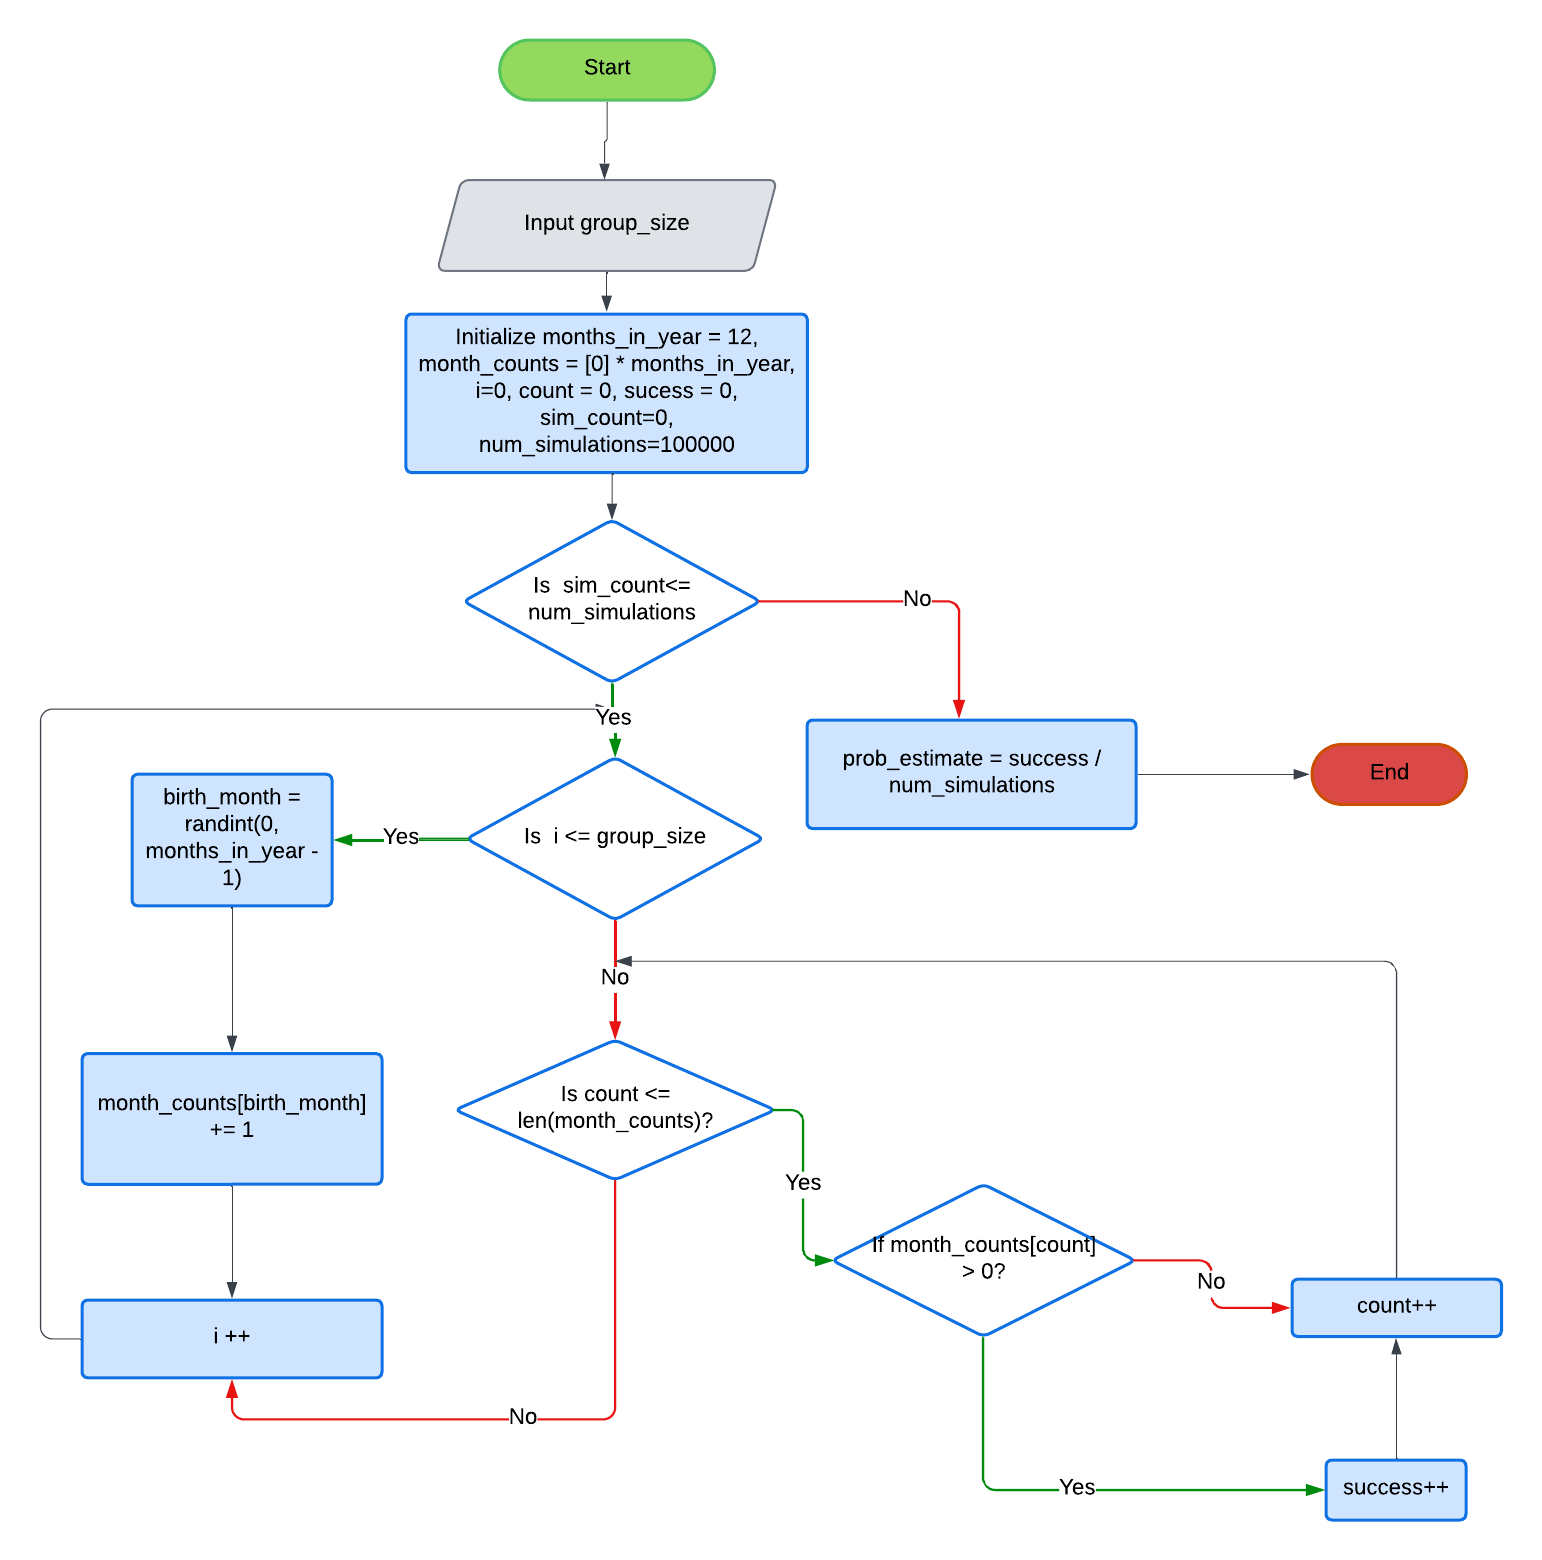

**Q 1.2 Compute the probability of all birthdays falling in the same month.**

In [24]:
import random

def all_birthdays_same_month(group_size, num_simulations=100000):
    success_count = 0

    # Finding the first person's birthday (randomly between 1 to 12) then matching it with the birth month of the rest 11 people(whoes birthdays are randly calculated)
    for _ in range(num_simulations):
        # Assign a random birth-month to the first individual
        first_person_birthday = random.randint(1, 12)

        all_same = True
        # Assign random birthdays to the remaining individuals
        # Looping over the rest (group_size - 1)
        for _ in range(group_size - 1):
            if random.randint(1, 12) != first_person_birthday:
                all_same = False
                break

        if all_same:
            success_count += 1

    # Calculate the estimated probability
    estimated_probability = success_count / num_simulations
    return estimated_probability

group_size = 3
estimated_prob = all_birthdays_same_month(group_size)
print(f"Estimated Probability of all {group_size} people having the same birthday month: {estimated_prob:.30e}")


group_size = 12
estimated_prob = all_birthdays_same_month(group_size)
print(f"Estimated Probability of all {group_size} people having the same birthday month: {estimated_prob:.30e}")

Estimated Probability of all 3 people having the same birthday month: 6.790000000000000028588242884098e-03
Estimated Probability of all 12 people having the same birthday month: 0.000000000000000000000000000000e+00


**Observation**:

Here given the group size, the probability of success will drastically decrease as $P(\text{All birthdays in the same month}) = 1 \times \left(\frac{1}{12}\right)^{(group\_size - 1)}$

So for a group size of 12, the exact probability that all individuals have their birthdays in the same month is:  

$P = \left(\frac{1}{12}\right)^{11}$ , which is very low


**Explanation**

**Algorithm:**

The algorithm estimates the probability for cases when all individuals in a group are born in the same month using a Monte Carlo simulation.

- Each person is assigned a random birth month (from 1 to 12).
- The first person's birth month is recorded and will be used for the rest of the comparisons (as all meembers will have the same birth month so the success case is they are assigned the same number).
- The remaining people are assigned random birth months, and each is compared to the first person's birth month, here the only this is since it is more of a comparision so we did not need to store their birthmonth, as we can just use the first person's birth month.
- Now if everyone in the group has the same birth month, we count it as a successful event.
- This process is repeated for for the simulations and then to estimate the probability we are dividing the success count by the number of simulation.


**Computational Complexity**
1. Outer Loop runs for num_simulations times: $O(\text{num_simulations})$.
2. Inner Loop runs group_size - 1 times per simulation: $O(\text{group_size})$.
3. The final Complexity is: $O(\text{num_simulations} \times \text{group_size})$

This is the most space efficient code among the rest as we do not need an additional list, the space complexity reamins to be $O(1)$

**Flow Chart**: To demonstrate the algorithm: Computing the **Probability of all birthdays falling in the same month**

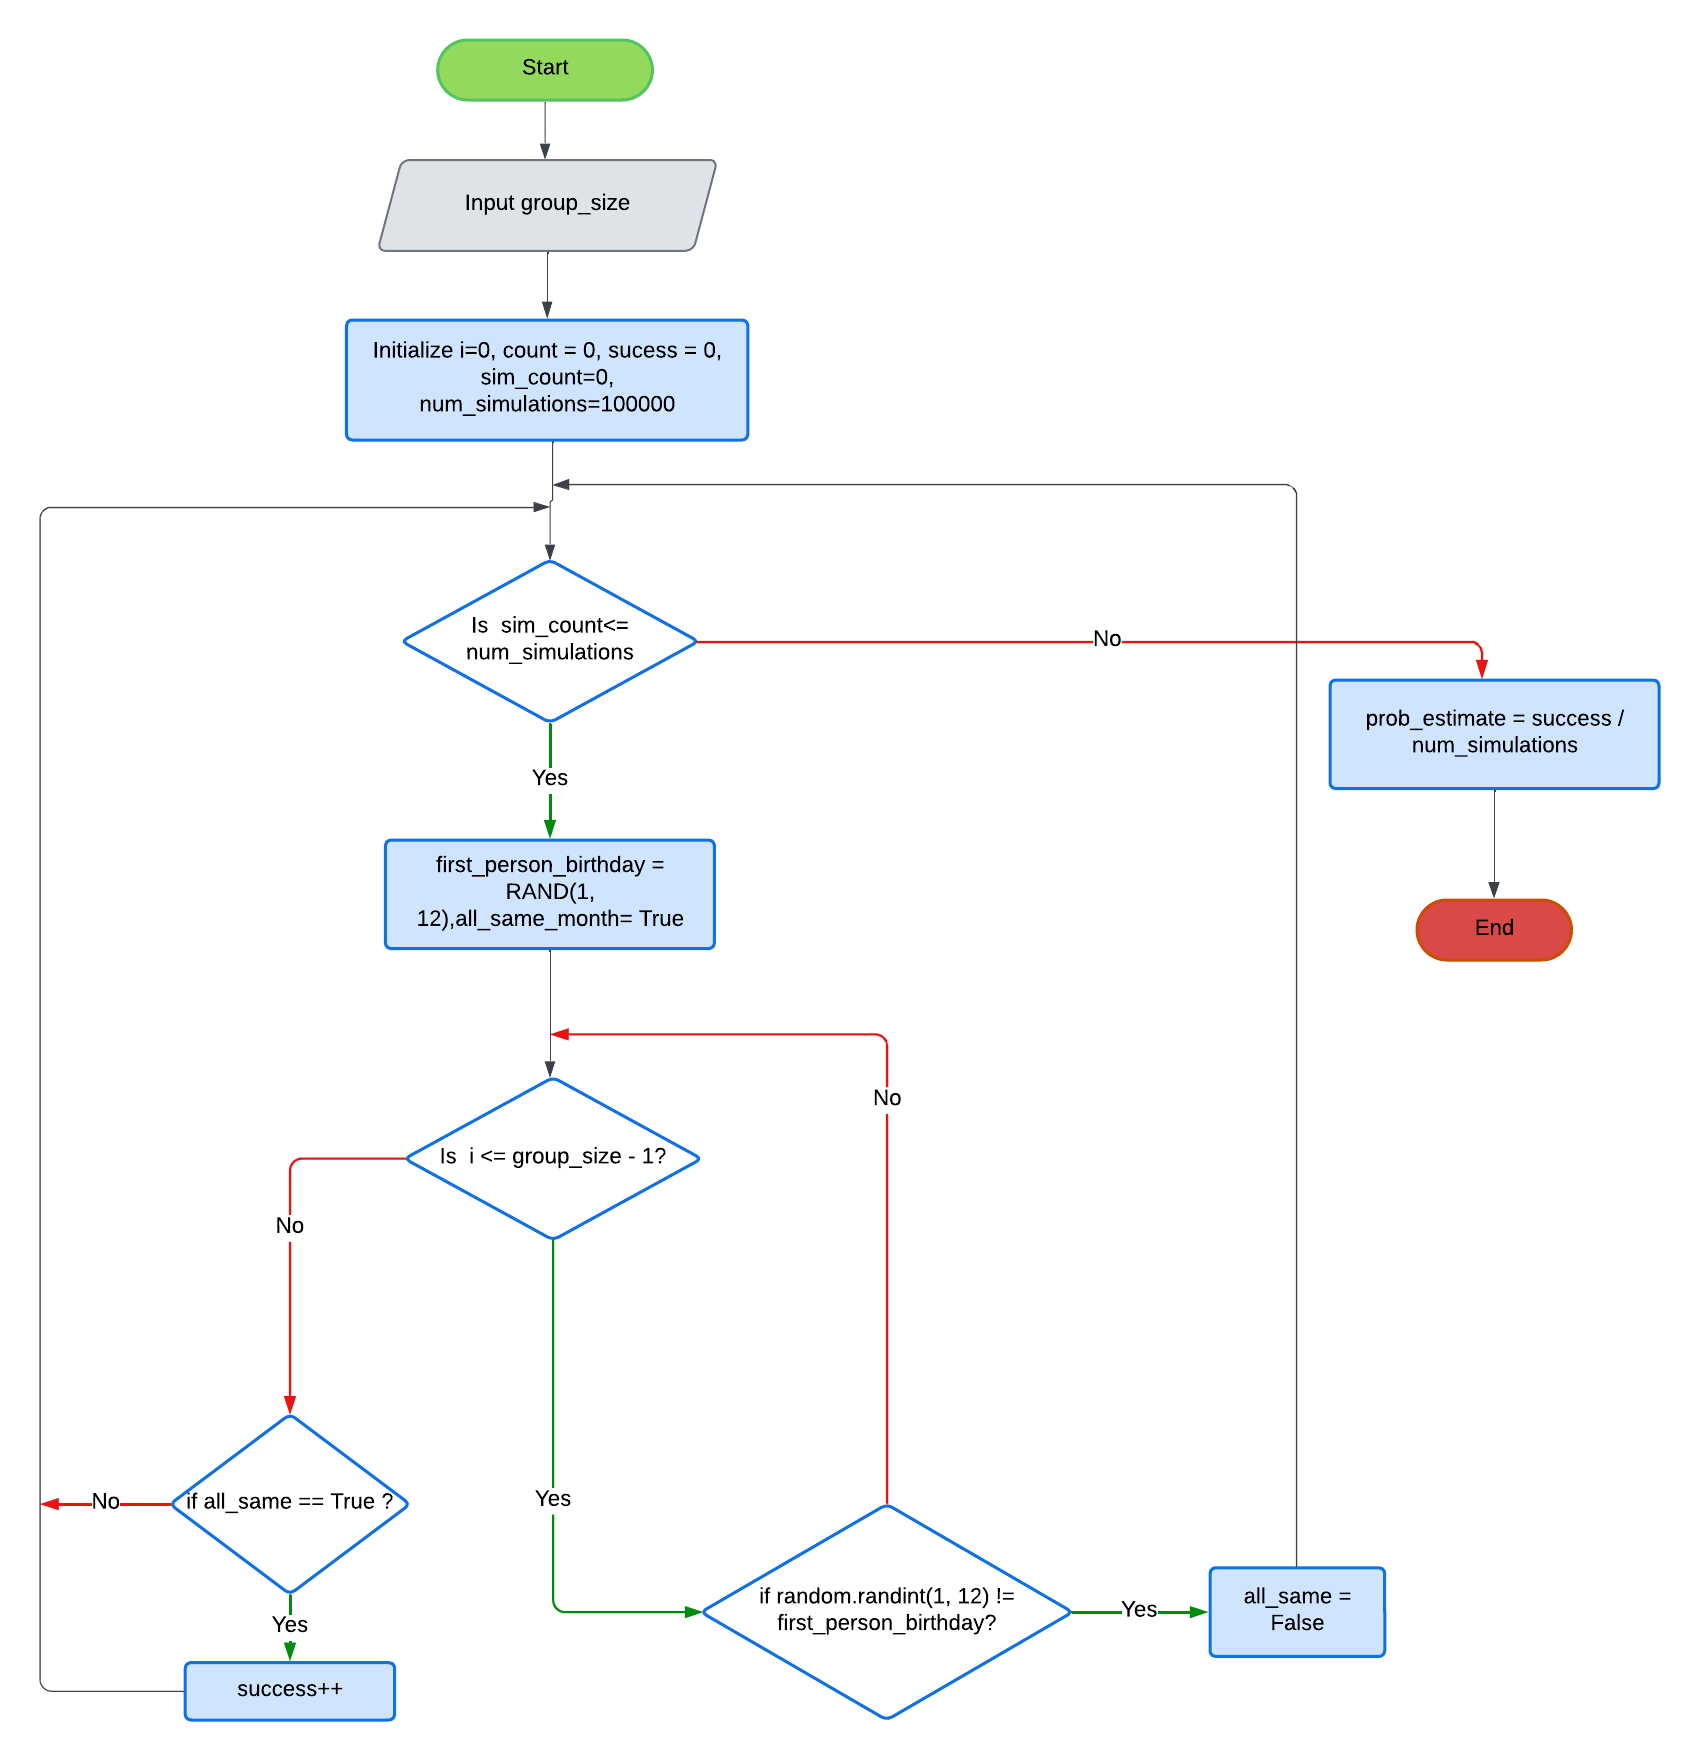

**Q 2.1 Adjust your code to compute the probability of having at least two birthdays per month instead of just one.**

In [25]:
import random

def at_least_two_birthdays_per_month(group_size, num_simulations=100000):
    # Cutoff condition: If group_size < 24, return probability 0, as the condition cannot be satisfied
    if group_size < 24:
        print(f"For the group size of {group_size} it is not possible to have at least two birthdays in every month.")
        return 0
    success_count = 0
    for _ in range(num_simulations):
        month_counts = [0] * 12
        for _ in range(group_size):
            # Months indexed from 0 to 11
            birth_month = random.randint(0, 11)
            month_counts[birth_month] += 1

        # Check if each month has at least two birthdays
        if all(count >= 2 for count in month_counts):
            success_count += 1

    # Calculate the estimated probability
    estimated_probability = success_count / num_simulations
    return estimated_probability

group_size = 28
estimated_prob = at_least_two_birthdays_per_month(group_size)
print(f"Estimated Probability of at least two birthdays per month for {group_size} people: {estimated_prob:.15e}")


Estimated Probability of at least two birthdays per month for 28 people: 5.600000000000000e-04


**Code Adjustments and the implementation logic**:

- Now the algorithm estimates the probability that each of the 12 month contains atleast two birthdays, so instead of checking that every month has at least one birthday, the code is now aqjusted to check at least two per month.
- This is been done using a list `month_counts` of size 12, where each index represents a month, and we count how many birthdays fall into each
- Like previously we checked if each month has one birthday, we have updated the if condition to check if every month has atleast two birthdays, and when this condition is satisfied the success count is incremented.
- This is done for the all the simulations and then by dividing the success count by the number of simulations we find the probability.


**Code Complexity & Performance Impact**

a. Time Complexity:
- Outer Loop runs num_simulations times: $O(\text{num_simulations})$
- Inner Loop runs for group_size times per simulation: $O(\text{group_size})$  
- Check if each month has at least two birthdays: this iterates over 12 months: $O(12) \approx O(1)$  
Total Time Complexity:  $O(\text{num_simulations} \times \text{group_size})$

b. Space Complexity: We are using the month_counts of size 12 hence $O(12) \approx O(1)$ along with other vairables.
Total space complexity is: $O(1)$

**Performance Impact:**

- The success criteria being that there needs to fall two birthdays per month , this makes thew probability significantly less likely in comarison to the case where all months needed to have atleast one birthday. Hence the probability will decrease as conpared to the previous case.

- We need to make sure there are more than atleast 24 people in the group else this condition is not going to be valid for lesser count.

- And since the probability is quite low, we need to mak sure to perform more simulations so to get a more stable estimate.


### **Large-Scale Optimization  for 1,000,000 Members**

**Q 1.1 Modify your algorithms to efficiently compute results for 1,000,000 members instead of 12**


In [88]:
group_size = 1000000

# 1. algorithm to calculate the probability of at least two members sharing a birthday
estimated_prob_atleast_two = simulate_shared_birthday_probability(group_size, num_simulations=1000)
print(f"Estimated Probability probability of at least two members sharing a birthday: {estimated_prob_atleast_two:.30e}")

# 2. probability of at least three people sharing a birthday
estimated_prob_atleast_three  = simulate_at_least_three_shared_birthdays(group_size, num_simulations=1000)
print(f"Estimated Probability at least three people sharing a birthday: {estimated_prob_atleast_three:.30e}")

# Fixed as with large group size was taking a lot of time
# 3. probability of exactly two people sharing a birthday
#estimated_prob_exactly_two = simulate_exactly_one_shared_birthday(group_size, num_simulations=10)
#print(f"Estimated Probability exactly two people sharing a birthday: {estimated_prob_exactly_two:.30e}")

# Fixed as with large group size was taking a lot of time
# 4. Compute Probability of At Least One Birthday Per Month
#estimated_prob_atleast_one_per_month = simulate_at_least_one_birthday_per_month(group_size, num_simulations=1000)
#print(f"Estimated Probability At Least One Birthday Per Month: {estimated_prob_atleast_one_per_month:.30e}")

# 5. Compute the probability of all birthdays falling in the same month
estimated_prob_atleast_all_in_a_month = all_birthdays_same_month(group_size, num_simulations=1000)
print(f"Estimated Probability all birthdays falling in the same month: {estimated_prob_atleast_all_in_a_month:.30e}")

# Fixed as with large group size was taking a lot of time
# 6. probability of having at least two birthdays per month
#estimated_prob_at_least_two_birthdays_per_month = at_least_two_birthdays_per_month(group_size, num_simulations=1000)
#print(f"Estimated Probability of at least two birthdays per month: {estimated_prob_at_least_two_birthdays_per_month:.30e}")


Estimated Probability probability of at least two members sharing a birthday: 1.000000000000000000000000000000e+00
Estimated Probability at least three people sharing a birthday: 1.000000000000000000000000000000e+00
Estimated Probability all birthdays falling in the same month: 0.000000000000000000000000000000e+00


#### **3. probability of exactly two people sharing a birthday**

In [78]:
import random
from collections import defaultdict

def simulate_exactly_one_shared_birthday_large_scale(group_size, num_simulations=10000):
    success_count = 0

    for _ in range(num_simulations):
        # Dictionary to track birthday occurrences
        birthday_counts = defaultdict(int)
        count_two_sharing_birthday = 0

        for _ in range(group_size):
            rand_day = random.randint(0, 364)
            birthday_counts[rand_day] += 1

            # Early exit if more than one pair is found
            if birthday_counts[rand_day] == 3:
                # More than one pair
                count_two_sharing_birthday = 2
                break

        # Count the number of days where exactly two people share a birthday
        count_two_sharing_birthday = sum(1 for count in birthday_counts.values() if count == 2)
        # Exactly one shared birthday
        if count_two_sharing_birthday == 1:
            success_count += 1

    probability = success_count / num_simulations
    return probability

group_size = 1000000
estimated_prob = simulate_exactly_one_shared_birthday(group_size)
print(f"Estimated probability of exactly one shared birthday in a group of {group_size}: {estimated_prob:.8f}")


Estimated probability of exactly one shared birthday in a group of 1000000: 0.05030000


#### **4. Compute Probability of At Least One Birthday Per Month**

In [68]:
import random

def simulate_at_least_one_birthday_per_month_large_scale(group_size, num_simulations=10000):
    # Cutoff condition: If group_size < 12, return probability 0
    if group_size < 12:
        print(f"Group size {group_size} is too small to cover all 12 months.")
        return 0.0

    success_count = 0
    months_in_year = 12  # Fixed constant

    for _ in range(num_simulations):
        # Using a set instead of a list to track unique months
        month_counts = set()

        # Assign birthdays to people
        for _ in range(group_size):
            birth_month = random.randint(0, months_in_year - 1)
            month_counts.add(birth_month)

            # Early exit if all 12 months are filled
            if len(month_counts) == 12:
                success_count += 1
                break  # No need to continue checking

    probability = success_count / num_simulations
    print(f"Simulations: {num_simulations}, Estimated Probability: {probability:.6f}")
    return probability

group_size = 1000000
num_simulations = 5000
estimated_probability = simulate_at_least_one_birthday_per_month(group_size, num_simulations)


Simulations: 5000, Estimated Probability: 1.000000


#### **6. probability of having at least two birthdays per month**

In [80]:
import random
import numpy as np

def at_least_two_birthdays_per_month_large_scale(group_size, num_simulations=1000):

    # If there are fewer than 24 people, it's impossible to have at least two birthdays in every month.
    if group_size < 24:
        print(f"For a group size of {group_size}, it is not possible to have at least two birthdays in every month.")
        return 0.0

    success_count = 0

    for _ in range(num_simulations):
        # Initialize an array of 12 integers all set to zero.
        # This will be used to count the number of birthdays per month.
        month_counts = np.zeros(12, dtype=int)

        # Assign random birth months to all
        birth_months = np.random.randint(0, 12, size=group_size)

        # Efficiently count using indexed addition
        np.add.at(month_counts, birth_months, 1)

        # Check if all 12 months have at least two birthdays
        if np.all(month_counts >= 2):
            success_count += 1

    probability = success_count / num_simulations
    return probability

group_size = 1000000
estimated_prob = at_least_two_birthdays_per_month_large_scale(group_size)

print(f"Estimated Probability of at least two birthdays per month for {group_size} people: {estimated_prob:.15e}")


Estimated Probability of at least two birthdays per month for 1000000 people: 1.000000000000000e+00


**Q 1.2 Discuss changes needed in data structures, computational approach, and optimizations.**

Few algorithms were taking a lot of time when executed with 1,000,000 members instead of 12.

To handel this I fixed two things,
1. A better datastructure to handel the operations more efficiently
2. Optimizing the calculations and coding

1. Data Structures Changes:
- simulate_exactly_one_shared_birthday -> using a dictionary(quick lookup,  reduces unnecessary memory allocation by dynamically storing only needed values)
- simulate_at_least_one_birthday_per_month -> using set(Saves Space)
- at_least_two_birthdays_per_month -> array(Numpy) which has a fixed size(faster array operations)

2. Code optimization:

- Early exit : To avoid uneccesary iteration
- Vectorized Operation like np.add.at() for faster counting
- dictionary counting (defaultdict(int)) to reduce unnecearry iteration where is no value over the array of size 365.


**Q 1.3 Explain how you would parallelize computations if needed.**


To parallelize computation we can use `multiprocessing`, it executes multiple independent Python processes, parallely, this is effective for CPU-bound tasks.

We can implement this usinf parallel_simulation function from the multiprocessing module to efficiently parallelize the Monte Carlo simulation, by disctributing workload over multiple CPU cores.

Bascially, we are going to not run all the simulations in a single process rather divide it in multiple processes.
We can create a pool of processes using multiprocessing.Pool() say we have created the pool or processes and assigned it to a variable pool, then pool.starmap executes multiple instances of out simulation function simultaneously, each handling its assigned batch of simulations.

Then once all the processes end the results i.e. the success counts are summed up and then the final estimate is done by dividing the sum by th number of simulation


**Q 2.1 Provide a Big O analysis of the optimized algorithms**

1. Simulating Exactly One Shared Birthday : Each person is assigned a birthday and we are counting the birthdays efficiently with defaultdict(int). Time Complexity : O(num_simulations*group_size), Space Complexity: O(group_size)

2. Simulating At Least One Birthday Per Month: Here when using a set()instead of a list, this is reducing unnecessary memory usage. Time Complexity: O(num_simulations*group_size), Space Complexity: O(12) ~ O(1) (constant)

3. At Least Two Birthdays Per Month: Using Numpy arrays. Time Complexity: O(num_simulations*group_size), Space Complexity: O(12) ~ O(1) (constant)

**Q 2.2. Number of Simulations**

Both therotically and practically we can see that a simulation betwee 50000 and 100000 is where mostly the result reaches its true value and stays that way, as it would be mostly uniform from there on. To justify this I would mention the previous graphs where the we can see the probability reached its true value and stayed more less the same form 50000 onwards.


**Q 2.3 Use Matplotlib to visualize performance differences between small and large datasets.**

Group size 10 is too small to cover all 12 months.
Simulations: 1000, Estimated Probability: 0.182000
Simulations: 1000, Estimated Probability: 0.849000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
Simulations: 1000, Estimated Probability: 1.000000
For a group size of 10, it is not possible to have at least two birthdays in every month.


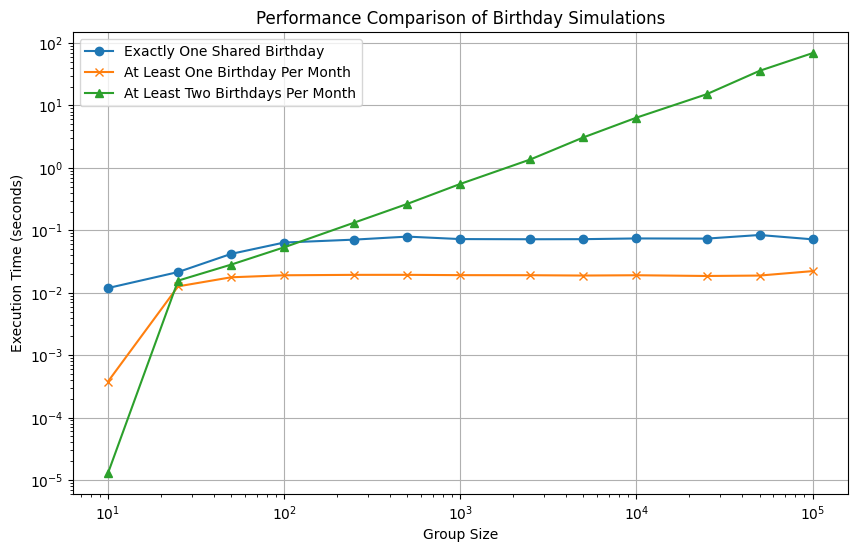

In [87]:
import time
import numpy as np
import matplotlib.pyplot as plt

def measure_execution_time(func, group_size, num_simulations):
    start_time = time.time()
    func(group_size, num_simulations)
    return time.time() - start_time

# Define test parameters
group_sizes = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000, 50000, 100000]
num_simulations = 1000

# Execution times
times_one_shared = [measure_execution_time(simulate_exactly_one_shared_birthday_large_scale, i, num_simulations) for i in group_sizes]
times_at_least_one = [measure_execution_time(simulate_at_least_one_birthday_per_month_large_scale, i, num_simulations) for i in group_sizes]
times_two_per_month = [measure_execution_time(at_least_two_birthdays_per_month_large_scale, i, num_simulations) for i in group_sizes]

plt.figure(figsize=(10, 6))
plt.plot(group_sizes, times_one_shared, marker='o', linestyle='-', label='Exactly One Shared Birthday')
plt.plot(group_sizes, times_at_least_one, marker='x', linestyle='-', label='At Least One Birthday Per Month')
plt.plot(group_sizes, times_two_per_month, marker='^', linestyle='-', label='At Least Two Birthdays Per Month')
plt.xlabel("Group Size")
plt.ylabel("Execution Time (seconds)")
plt.xscale("log")
plt.yscale("log")
plt.title("Performance Comparison of Birthday Simulations")
plt.legend()
plt.grid(True)
plt.show()
